In [ ]:

import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, ConfusionMatrixDisplay, confusion_matrix

In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LOAD_FROM_GDRIVE = True

In [ ]:

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/AAI-540 Capestone Group 3/Dataset'

# List all files in the directory
file_list = os.listdir(dataset_path)
print("Files in the dataset directory:")
print(file_list)
def preview_dataset(file_path):
    try:

        data = pd.read_csv(file_path)
        print(f"\nPreview of {file_path}:")
        print(data.head())
    except Exception as e:
        print(f"Could not load {file_path}. Error: {e}")

for file_name in file_list:
    full_path = os.path.join(dataset_path, file_name)
    if file_name.endswith('.csv'):
        preview_dataset(full_path)
    else:
        print(f"{file_name} is not a CSV file and will be skipped.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the dataset directory:
['Dataset.csv', 'Cleaned_Dataset.csv', 'Updated_Dataset.csv', 'Vital_Shifts.csv', 'Lab_Shifts.csv', 'Vital_vs_Lab_Shifts.csv', 'Train_Data.csv', 'Lab_vs_Vital_Correlation.csv']

Preview of /content/drive/MyDrive/AAI-540 Capestone Group 3/Dataset/Dataset.csv:
   Unnamed: 0  Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  ...  \
0           0     0   NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN  ...   
1           1     1  65.0  100.0   NaN    NaN  72.0   NaN  16.5    NaN  ...   
2           2     2  78.0  100.0   NaN    NaN  42.5   NaN   NaN    NaN  ...   
3           3     3  73.0  100.0   NaN    NaN   NaN   NaN  17.0    NaN  ...   
4           4     4  70.0  100.0   NaN  129.0  74.0  69.0  14.0    NaN  ...   

   Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  6

In [ ]:

# Define dataset root path
dataset_root = '/content/drive/MyDrive/AAI-540 Capestone Group 3/Dataset/'

try:
    train_data = pd.read_csv(os.path.join(dataset_root, 'Train_Data.csv'))

    label_column = 'SepsisLabel'

    X_train = train_data.drop(columns=[label_column])
    y_train = train_data[label_column]

    print("Data successfully split into features and labels.")
    print("Sample of X_train:")
    print(X_train.head())
    print("Sample of y_train:")
    print(y_train.head())
except FileNotFoundError as e:
    print(f"File not found: {e}")
except KeyError as e:
    print(f"Column not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



Data successfully split into features and labels.
Sample of X_train:
   Patient_ID  Hour    HR    SBP   MAP   DBP  O2Sat  Lactate  Creatinine  \
0       17072     0   NaN    NaN   NaN   NaN    NaN      NaN         NaN   
1       17072     1  65.0    NaN  72.0   NaN  100.0      NaN         NaN   
2       17072     2  78.0    NaN  42.5   NaN  100.0      NaN         NaN   
3       17072     3  73.0    NaN   NaN   NaN  100.0      NaN         NaN   
4       17072     4  70.0  129.0  74.0  69.0  100.0      NaN         0.8   

   Platelets  Glucose   WBC  
0        NaN      NaN   NaN  
1        NaN      NaN   NaN  
2        NaN      NaN   NaN  
3        NaN      NaN   NaN  
4      330.0    161.0  11.3  
Sample of y_train:
0    0
1    0
2    0
3    0
4    0
Name: SepsisLabel, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Train data shape: X: {X_train.shape}, y: {y_train.shape}")
print(f"Test data shape: X: {X_test.shape}, y: {y_test.shape}")
print(f"Validation data shape: X: {X_val.shape}, y: {y_val.shape}")


Train data shape: X: (1086547, 12), y: (1086547,)
Test data shape: X: (232831, 12), y: (232831,)
Validation data shape: X: (232832, 12), y: (232832,)


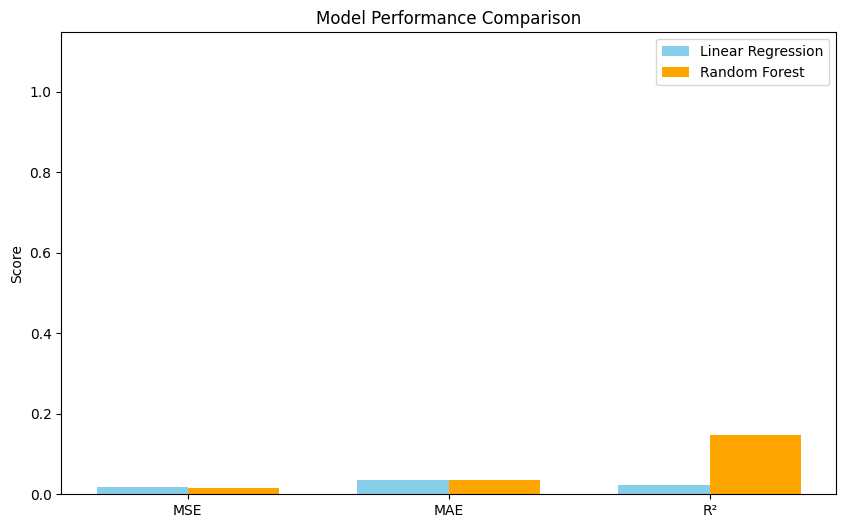

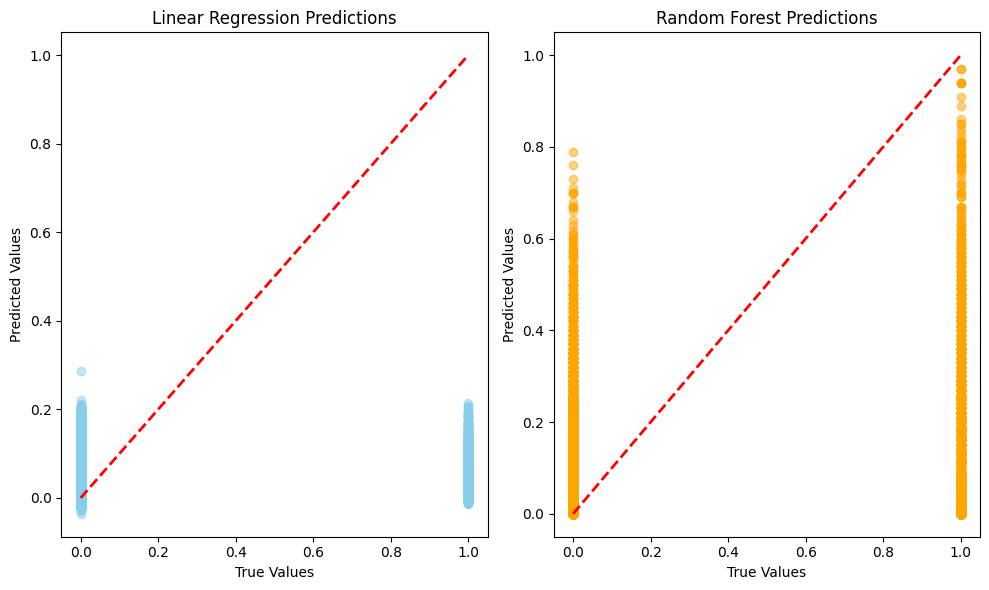

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_val_pred_linear = linear_model.predict(X_val)

# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_val_pred_rf = random_forest.predict(X_val)

mse_linear = mean_squared_error(y_val, y_val_pred_linear)
mae_linear = mean_absolute_error(y_val, y_val_pred_linear)
r2_linear = r2_score(y_val, y_val_pred_linear)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

metrics_linear = [mse_linear, mae_linear, r2_linear]
metrics_rf = [mse_rf, mae_rf, r2_rf]
labels = ["MSE", "MAE", "R²"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_linear, width, label="Linear Regression", color="skyblue")
plt.bar(x + width/2, metrics_rf, width, label="Random Forest", color="orange")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, labels)
plt.ylim(0, max(max(metrics_linear), max(metrics_rf)) + 1)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred_linear, alpha=0.5, color="skyblue")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Linear Regression Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred_rf, alpha=0.5, color="orange")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Random Forest Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9809 - auc: 0.6998 - loss: 0.0906 - val_accuracy: 0.9824 - val_auc: 0.7563 - val_loss: 0.0795
Epoch 2/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9819 - auc: 0.7463 - loss: 0.0816 - val_accuracy: 0.9824 - val_auc: 0.7652 - val_loss: 0.0787
Epoch 3/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9821 - auc: 0.7494 - loss: 0.0807 - val_accuracy: 0.9824 - val_auc: 0.7663 - val_loss: 0.0787
Epoch 4/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9822 - auc: 0.7517 - loss: 0.0801 - val_accuracy: 0.9824 - val_auc: 0.7676 - val_loss: 0.0789
Epoch 5/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9819 - auc: 0.7549 - loss: 0.0810 - val_accuracy: 0.9824 - val_auc: 0.7691 - val_loss: 0.0784
Epoch 6/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9820 - auc: 0.7522 - loss: 0.0810 - val_accuracy: 0.9824 - val_auc: 0.7642 - val_loss: 0.0788
Epoch 7/50

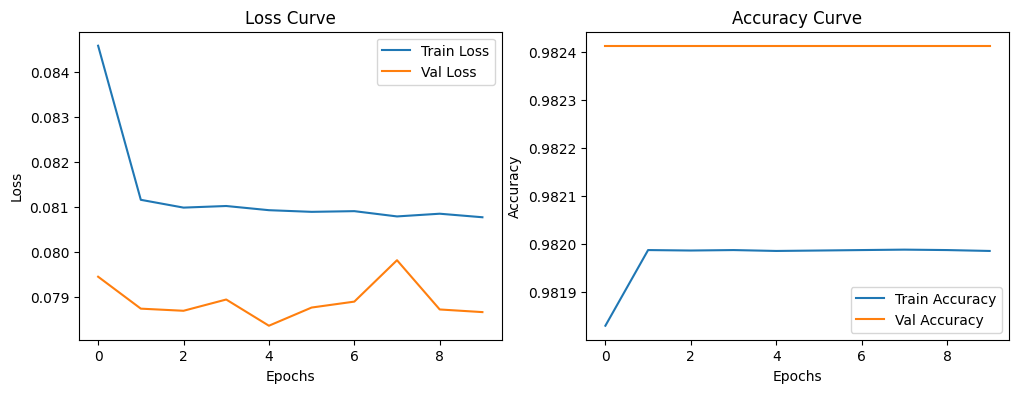

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt


data_path = '/content/drive/MyDrive/AAI-540 Capestone Group 3/Dataset/Updated_Dataset.csv'
data = pd.read_csv(data_path)


X = data.drop(columns=['SepsisLabel'])
y = data['SepsisLabel']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape data for CNN input
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC()])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
Hyperparamter tuning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9806 - auc_1: 0.7020 - loss: 0.0917 - val_accuracy: 0.9824 - val_auc_1: 0.7545 - val_loss: 0.0792
Epoch 2/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.9820 - auc_1: 0.7445 - loss: 0.0814 - val_accuracy: 0.9824 - val_auc_1: 0.7581 - val_loss: 0.0793
Epoch 3/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9819 - auc_1: 0.7461 - loss: 0.0814 - val_accuracy: 0.9824 - val_auc_1: 0.7672 - val_loss: 0.0785
Epoch 4/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9819 - auc_1: 0.7545 - loss: 0.0811 - val_accuracy: 0.9824 - val_auc_1: 0.7713 - val_loss: 0.0785
Epoch 5/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.9816 - auc_1: 0.7546 - loss: 0.0819 - val_accuracy: 0.9824 - val_auc_1: 0.7666 - val_loss: 0.0787
Epoch 6/50
33955/33955 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9819 - auc_1: 0.7521 - loss: 0.0812 - val_accuracy: 0.9824 - val_auc_1: 0.7680 - val

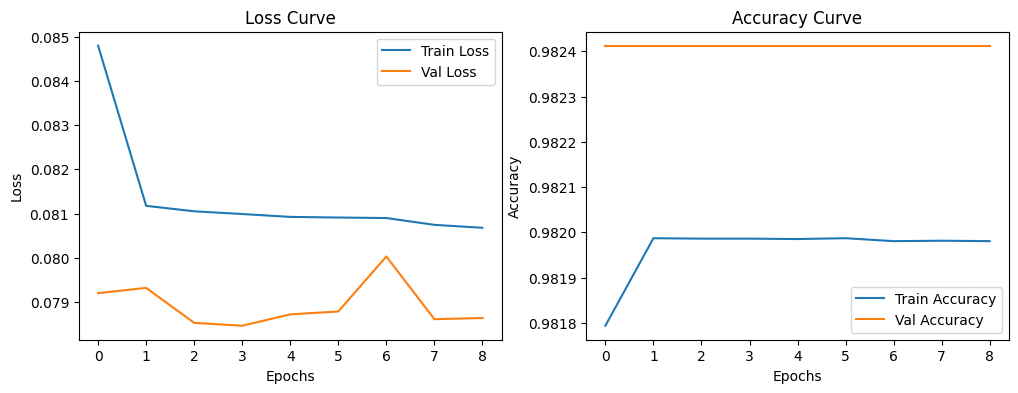

In [ ]:

filters_1 = 32
filters_2 = 64
kernel_size = 3
dropout_rate = 0.3
dense_units = 128
learning_rate = 0.001
batch_size = 32
epochs = 50

# Define the CNN model
model = Sequential([
    Conv1D(filters=filters_1, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Conv1D(filters=filters_2, kernel_size=kernel_size, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    Flatten(),
    Dense(dense_units, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC()])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=1
)


test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
